## **Feature Engineering**
## PCA

In [85]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

In [86]:
iris_bunch = load_iris()

In [87]:
X = iris_bunch.data
y = iris_bunch.target

In [88]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)

Normalising the data

In [89]:
from sklearn.preprocessing import StandardScaler

In [90]:
sc = StandardScaler()

In [91]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

We use **fit_transform** on training data when we want to fit our method on training data and we want to transform it as well. We use fit_transform when we are using any Preprocessing methods.

## Implementing PCA

In [92]:
from sklearn.decomposition import PCA

In [93]:
pca = PCA()

In [94]:
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.fit_transform(X_test)

While performing PCA, we fit_transform our train and test data separately because:
- To accurately gauge model performance on unseen data.
- Data Leakage: Occurs when information from the test set unintentionally influences model training or preprocessing.

---------------------------------------------------------------
How can we look at the PCA components?
- The output will show 1st, 2nd, 3rd and 4th Principle Component.

In [95]:
print(pca.explained_variance_ratio_)

[0.73744719 0.21241944 0.04465979 0.00547358]


In PCA the number of principle components generated will be equal to or less than number of features at the input.

In [96]:
pca_2 = PCA(n_components=2)

X_train_pca_2 = pca_2.fit_transform(X_train)
X_test_pca_2 = pca_2.fit_transform(X_test)

In [97]:
print(pca_2.explained_variance_ratio_)

[0.73744719 0.21241944]


In [98]:
print(X_train_pca_2.shape)

(112, 2)


In [99]:
print(X_test_pca_2.shape)

(38, 2)


In [100]:
from sklearn.neighbors import KNeighborsClassifier

In [101]:
KNN = KNeighborsClassifier()
KNN.fit(X_train_pca_2, y_train)

KNeighborsClassifier()

In [102]:
y_pred_pca = KNN.predict(X_test_pca_2)

In [103]:
from sklearn.metrics import accuracy_score
print('The accuracy is:', accuracy_score(y_test, y_pred_pca))

The accuracy is: 0.8947368421052632


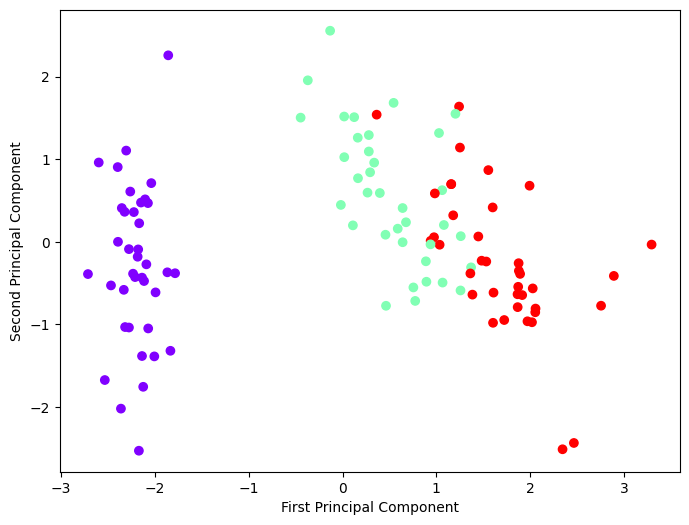

In [104]:
plt.figure(figsize=(8,6))
plt.scatter(X_train_pca_2[:,0], X_train_pca_2[:,1], c=y_train, cmap = 'rainbow')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

## Implementing LDA

In LDA the number of principle components generated will be less than number of features at the input.

In [105]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [106]:
lda = LDA()

In [107]:
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

In [108]:
print(lda.explained_variance_ratio_)

[0.98969627 0.01030373]


In [109]:
KNN_lda = KNeighborsClassifier()
KNN_lda.fit(X_train_lda, y_train)

KNeighborsClassifier()

In [110]:
y_pred_lda = KNN_lda.predict(X_test_lda)

In [111]:
print('The Accuracy is:', accuracy_score(y_test, y_pred_lda))

The Accuracy is: 0.9473684210526315


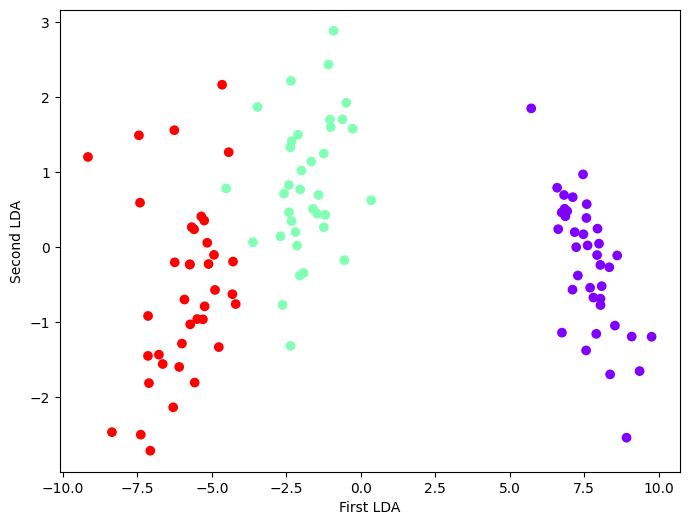

In [112]:
plt.figure(figsize=(8,6))
plt.scatter(X_train_lda[:,0], X_train_lda[:,1], c=y_train, cmap = 'rainbow')
plt.xlabel('First LDA')
plt.ylabel('Second LDA')
plt.show()